In [ ]:
#The aim of this project is to analyze and gain insights into the popularity of mobile phone transactions on the Carousell 
#platform, focusing on specific brands. The investigation will concentrate on four prominent mobile phone brands: 
#Apple, Samsung, Huawei, and Moto. The project seeks to understand the distribution of transactions, average prices, 
#and the prevalence of 'used' and 'new' listings for each brand.

In [118]:
from requests_html import HTMLSession
import pandas as pd
from bs4 import BeautifulSoup
import re

    
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements


# Data Transformation

In [ ]:
#We will employ 'BeautifulSoup' and 'requests_html' libraries to extract HTML elements from Carousell listings. 
#The extracted elements will be transformed into organized data sets, including product name, price, description, 
#and status (used/new).

In [156]:
url = 'https://ca.carousell.com/categories/electronics-7/mobile-phones-430/addRecent=false&canChangeKeyword=false&includeSuggestions=false&searchId=AArJtw'

paragraphs = parse_elements(url, 'p')
#Regular expression on geting time data
time_pattern = r'\d+ (?:hour(s*)|day(s*)|month(s*)|year(s*)) ago'
time_line_found = False
df = pd.DataFrame()
product_list = []
price_list = []
description_list = []
status_list = []

#Loop through each line
for line in paragraphs:
#if it matches to time_pattern, set time_line_found as True
    if (re.match(time_pattern, line.text)):
        time_line_found = True
#initiate line_count
        line_count = 0
#else if time_line_found = True and it is line 0-3 
    elif time_line_found and line_count <4:
        line_count = line_count + 1
#Get the Product name if it is line 1
        if line_count == 1:
            product_name = line.text
            product_list.append(product_name)
#Get the Product Price if it is line 2
        elif line_count == 2:
# Remove commas from the price string and then convert to integer         
            product_price = int(line.text.replace('C$', '').replace(',', ''))
            price_list.append(product_price)
#Get the Product Description if it is line 3
        elif line_count == 3:
            product_description = line.text
            description_list.append(product_description)
#Get the Product Status if it is line 4
        else:
            product_status = line.text
            status_list.append(product_status)

# To create a dataframe by combining the lists
df = pd.DataFrame(list(zip(product_list,price_list, description_list, status_list)), columns=['Product', 'Price', 'Description', 'Status'])

# Brand Detection

In [ ]:
# Utilizing the product name, we will implement a mechanism to accurately determine the brand associated with each 
#mobile phone listing. This brand attribution will enhance our analysis by allowing us to segregate transactions by brand.

In [158]:
def brand_detection(sentence):
    Apple_word = ('iPhone','Iphone', 'IPHONE','Apple','IPhone')
    Samsung_word = ('Samsung', 'samsung')
    Huawei_word = ('Huawei', 'huawei')
    Moto_word = ('Moto','moto')
    
    Apple = any(sentence.count(i) > 0 for i in Apple_word)
    Samsung = any(sentence.count(i) > 0 for i in Samsung_word)
    Huawei = any(sentence.count(i) > 0 for i in Huawei_word)
    Moto = any(sentence.count(i) > 0 for i in Moto_word)

    if Apple:
        return 'Apple'
    elif Samsung:
        return 'Samsung'
    elif Huawei:
        return 'Huawei'
    elif Moto:
        return 'Moto'
    else:
        return 'Others'


df['Brand'] = df['Product'].apply(brand_detection)
df

,Product,Price,Description,Status,Brand
0,Apple iPhone 11 - 64GB,200,Cracked screen but works perfectly,Used,Apple
1,IPhone 13 Pro Max Unlocked Cell Phone,650,IPhone 13 Pro Max in Gold. - 256 GB hard drive...,New,Apple
2,iPhone 13 Pro Max 128gb,400,Brand new and it comes with the factory box an...,New,Apple
3,"iPhone 14 Pro Max, 512 GB, Black, In Box",850,"Unopened iPhone 14 Pro Max, 512 GB, Black. Got...",New,Apple
4,Apple iPhone 14 pro max - 512GB,195,I’m selling it cheap cos I bought it for my gr...,New,Apple
5,"iPhone and iPad MDM Mode Unlock Service, All M...",30,All iPhone and iPad Models Supported: If there...,New,Apple
6,IPHONE 13 pro for sale,350,IPHONE 13 pro Color: SIERRA BLUE 256GB 100%hea...,New,Apple
7,Moto g 128g 5g,370,hi everyone I'm selling this phone because I g...,New,Moto
8,Moto g 128g 5g,370,hi everyone I'm selling the phone because I go...,New,Moto
9,iPhone 13,100,Mobile Phones,Used,Apple


# Data Analysis

In [146]:
#To counts the occurrences of the brand and status in the dataframe
brand_amount = df['Brand'].value_counts()
status_amount_by_brand = df.groupby('Brand')['Status'].value_counts().unstack(fill_value=0)
status_amount_by_brand

Status,New,Used
Brand,,
Apple,21,16
Huawei,0,2
Moto,2,0
Others,1,2
Samsung,0,2


In [ ]:
#We will create a stacked bar chart to visualize the total number of brands and the distribution of status (used/new) 
#for the items listed on Carousell. This visualization will provide an overview of the platform's mobile phone offerings 
#and the proportion of different status types.

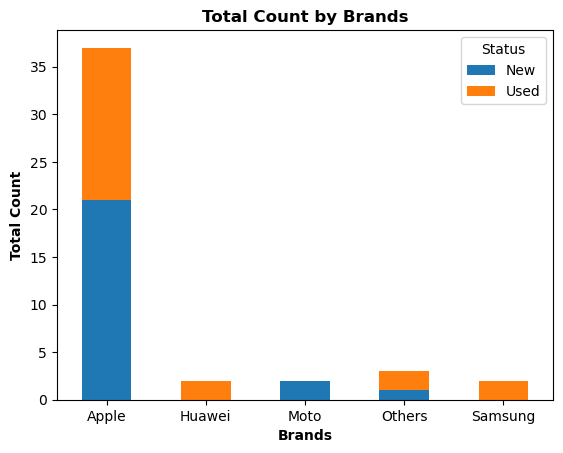

In [133]:
import matplotlib.pyplot as plt

#Plotting the bar graph
status_amount_by_brand.plot(kind ='bar', stacked =True)
#Customize the graph
plt.title('Total Count by Brands', fontweight = 'bold')
plt.xlabel('Brands', fontweight = 'bold')
plt.ylabel('Total Count', fontweight = 'bold')
plt.xticks(rotation=0)
plt.legend(title='Status')

plt.show()

In [ ]:
#By grouping the data based on brands, we will calculate the average and median prices for each brand. The 
#'statistics' library will be employed to derive these metrics. Subsequently, a bar chart will be generated to 
#display the brand-wise average and median prices.

In [106]:
import statistics

grouped_df = df.groupby('Brand')
average_price = grouped_df['Price'].mean()
median_price = grouped_df['Price'].apply(statistics.median)
median_price = median_price.sort_values(ascending = False)



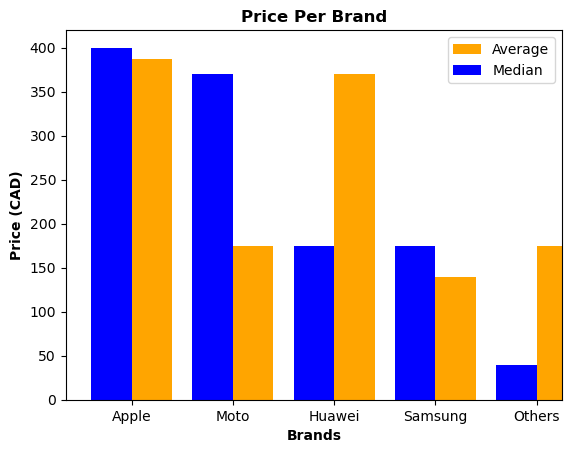

In [155]:
#Plotting the bar graph
average_price.plot(kind='bar', color='orange', position = 0, width = 0.4, label='Average')
median_price.plot(kind='bar', color = 'blue', position = 1, width = 0.4, label= 'Median')


#Customize the graph
plt.title('Price Per Brand', fontweight = 'bold')
plt.xlabel('Brands', fontweight = 'bold')
plt.ylabel('Price (CAD)', fontweight = 'bold')
plt.xticks(rotation=0)

plt.legend()
plt.show()

In [ ]:
#The findings highlight a notable trend towards Apple products, with a substantial portion of the listings originating 
#from this brand. Furthermore, the analysis of pricing revealed that Apple products command the highest average and 
#median prices, approximately amounting to $400 CAD. This observation underscores the premium value associated with 
#Apple devices within the Carousell ecosystem.